In [1]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os

EDS_files = [
'cora_sampling_method=EDS_K_sparsity=100_results.p',
'cora_sampling_method=EDS_K_sparsity=10_results.p',
'cora_sampling_method=EDS_K_sparsity=5_results.p' ]



Greedy_files = [

'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=1_results.p']

max_files = ['cora_sampling_method=MaxDegree_maxdegree_results.p']

random_file = ['cora_sampling_method=Random_random_results.p']


In [2]:
def open_files(files):
    file_content = []
    for file in  files:
        try:
            with open(file, 'rb') as f:
                file_content.append(pk.load(f, encoding='latin1'))
        except Exception as e:
            print(e)
            print("No " + file)
    return file_content
            
eds_results = open_files(EDS_files)
geedy_results = open_files(Greedy_files)
max_results = open_files(max_files)
random_results = open_files(random_file)



In [15]:
def results_to_lines(results):
    lines = []
    for result in results:
        line = result['results']
        x = []
        y = []
        var = []
        for point in line:
            x.append(point[1])
            y.append(point[2])
            var.append(point[3])
        lines.append((x,y,var,result['info']))
    return lines

random_ref_line = results_to_lines(random_results)[0]

def plot(title, save_file,lines, label_name = None):
    plt.errorbar(random_ref_line[0],random_ref_line[1],yerr=random_ref_line[2],alpha = 0.7,color = 'r',label="Random sampling",fmt='o-')
    for line in lines:
        if label_name is not None:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,label=label_name+":"+str(line[3][label_name]),fmt='o-')
        else:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,fmt='o-')
    
    
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
   # plt.title(title)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight", dpi = 300)



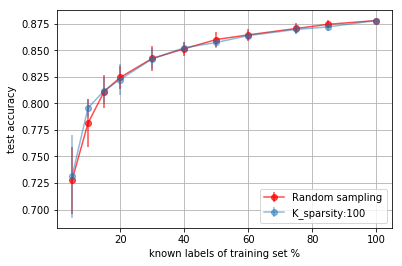

In [16]:
plot("EDS sampling","EDS_sampling_K_100.jpg",results_to_lines(eds_results)[0:1],'K_sparsity')



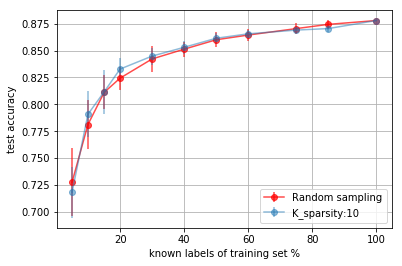

In [17]:
plot("EDS sampling","EDS_sampling_K10.jpg",results_to_lines(eds_results)[1:2],'K_sparsity')


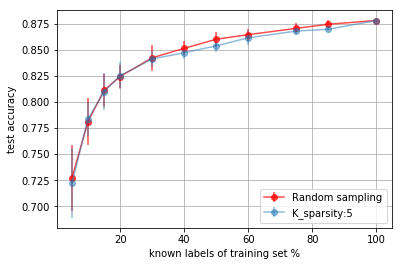

In [18]:
plot("EDS sampling","EDS_sampling_K5.jpg",results_to_lines(eds_results)[2:3],'K_sparsity')

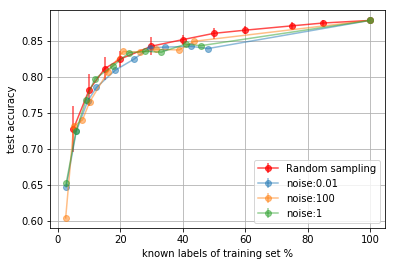

In [19]:
plot("Greedy sampling, K sparsity = 100 ","Greedy_K100_sampling.jpg",results_to_lines(geedy_results[0:3]),'noise')


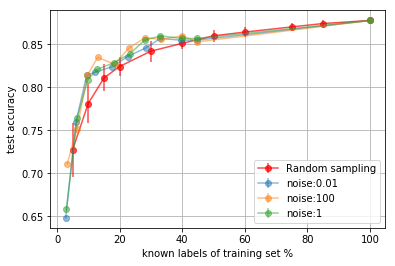

In [20]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling.jpg",results_to_lines(geedy_results[3:6]),'noise')


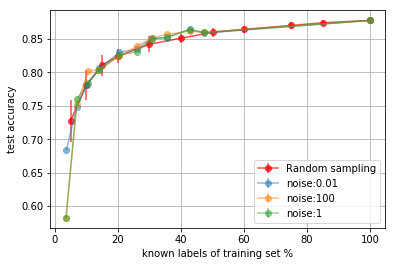

In [21]:
plot("Greedy sampling, K sparsity = 5 ","Greedy_K5_sampling.jpg",results_to_lines(geedy_results[6:9]),'noise')

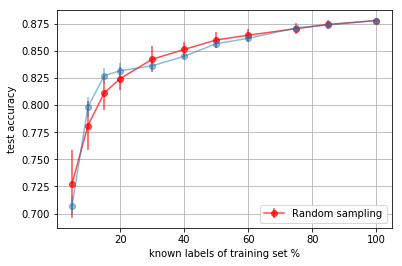

In [22]:
plot("Max degree sampling,","Max_sampling.jpg",results_to_lines(max_results))